In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_yearly

In [2]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data 

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Fourier Order for Seasonalities

In [3]:
m1 = Prophet(yearly_seasonality=10).fit(data)
m2 = Prophet(yearly_seasonality=20).fit(data)
m3 = Prophet(yearly_seasonality=50).fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.41    0.00109841       326.358      0.7019      0.7019      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7990.03    0.00870456       663.895      0.4236      0.4236      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7994.7    0.00088867       189.435       2.393      0.2393      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7999.23   0.000490727       311.727       0.255           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       8000.37   3.72506e-05       109.303   1.977e-07       0.001      577  LS failed, Hessian reset 
     499       8001.34    0.00358046    

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8020.23     0.0118295       700.059      0.9793      0.9793      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8037.61    0.00272327       231.404     0.08036           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8043.45    0.00033478       317.523      0.5599      0.5599      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8045.21   0.000638403       177.942      0.5367           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8046.42     0.0187097       566.963           1           1      616   
    Iter      log prob        ||dx||      ||grad||       alpha  

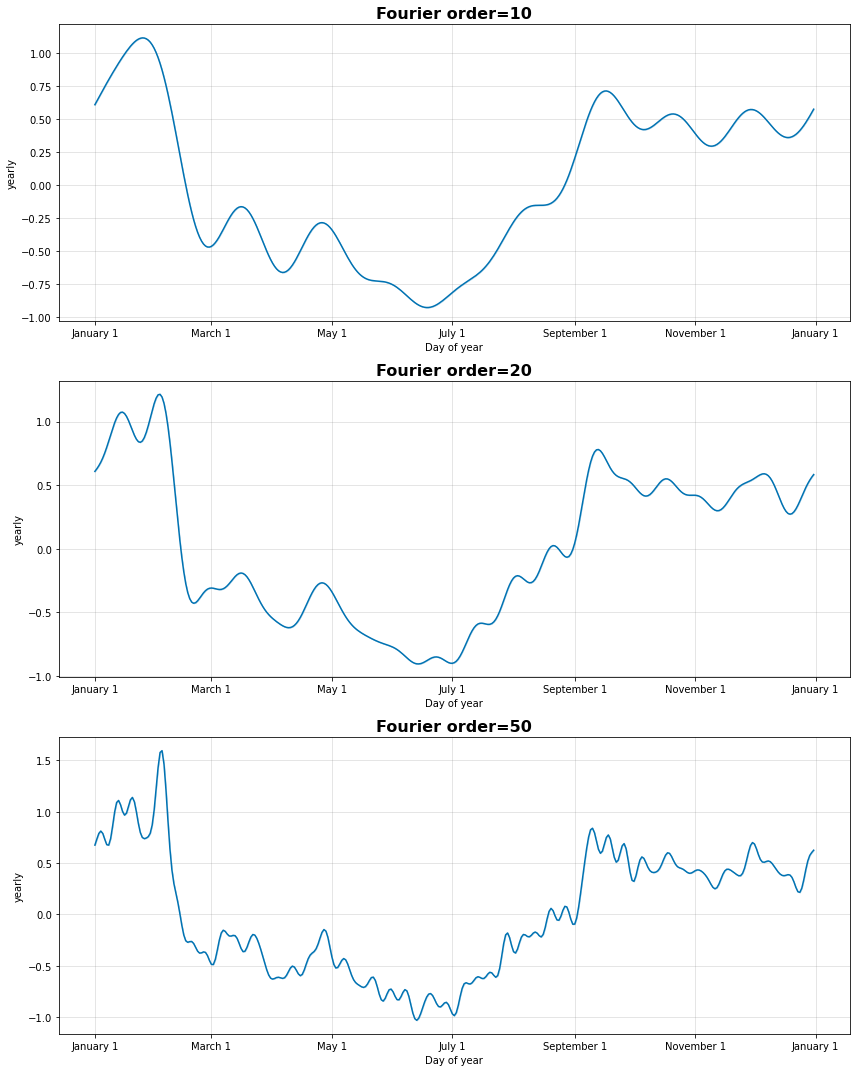

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(12,15))

plot_yearly(m1, ax=ax[0])
ax[0].set_title("Fourier order=10", fontsize=16, fontweight='bold')

plot_yearly(m2, ax=ax[1])
ax[1].set_title("Fourier order=20", fontsize=16, fontweight='bold')

plot_yearly(m3, ax=ax[2])
ax[2].set_title("Fourier order=50", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Add/remove seasonality

In [5]:
m = Prophet(weekly_seasonality=False) # remove weekly
m.add_seasonality(name='monthly', period=30.5, fourier_order=5) # add monthly
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7782.86     0.0027793       420.117      0.4995      0.4995      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7798.09   0.000243593       236.177      0.5944      0.5944      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7801.59   0.000222149       73.6384           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7803.97    0.00044919       92.2843      0.3182      0.8549      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7805.39   0.000171441       91.5016           1           1      624   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     582     

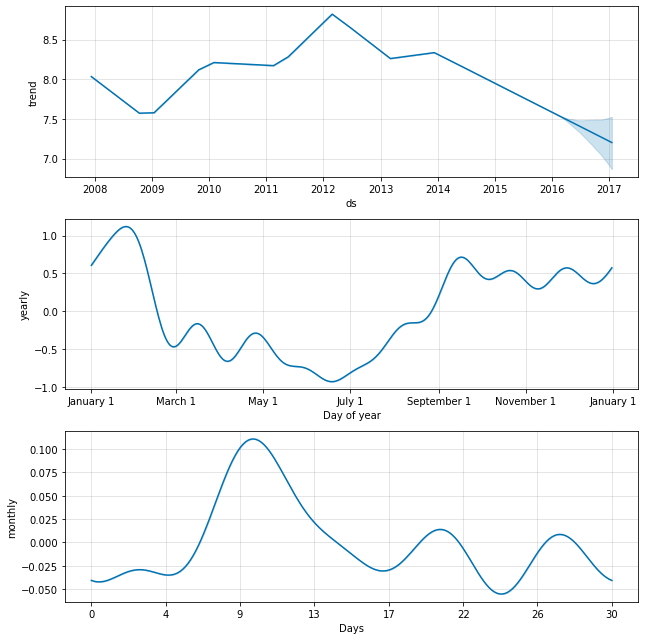

In [6]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot_components(forecast)
plt.show()

## conditional seasonalities

In [7]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

In [8]:
data['on_season'] = data['ds'].apply(is_nfl_season)
data['off_season'] = ~data['ds'].apply(is_nfl_season)

In [9]:
data

,ds,y,on_season,off_season
0,2007-12-10,9.590761,True,False
1,2007-12-11,8.519590,True,False
2,2007-12-12,8.183677,True,False
3,2007-12-13,8.072467,True,False
4,2007-12-14,7.893572,True,False
...,...,...,...,...
2900,2016-01-16,7.817223,True,False
2901,2016-01-17,9.273878,True,False
2902,2016-01-18,10.333775,True,False
2903,2016-01-19,9.125871,True,False


In [10]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        8178.8    0.00764764       525.376           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8201.04    0.00333245       272.167           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8204.99   0.000964252       465.376           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8208.71    0.00126579       239.548      0.9031      0.9031      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8210.76   0.000208635       117.361           1           1      605   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     556     

In [11]:
future = m.make_future_dataframe(periods=365)
future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.predict(future)

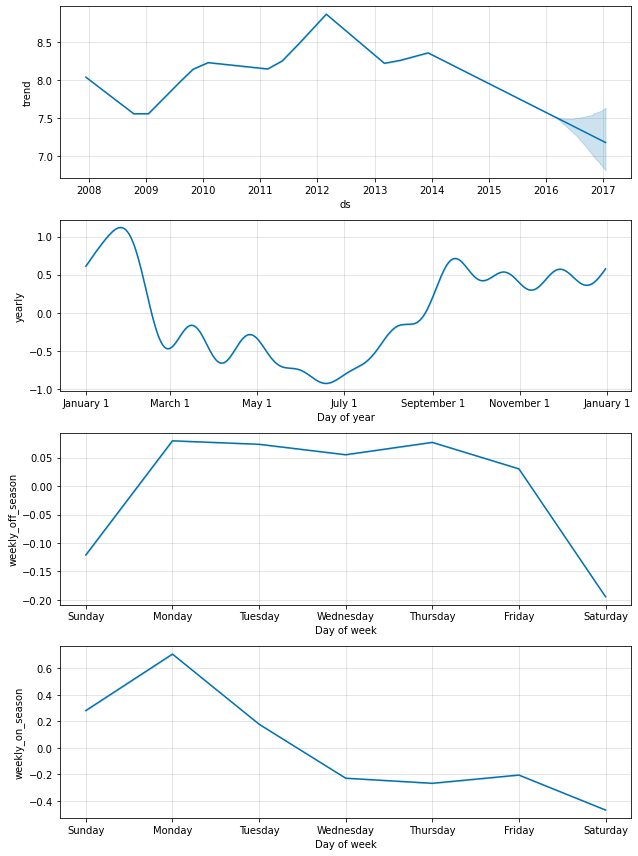

In [12]:
m.plot_components(forecast)
plt.show()

## Additional regressors

In [13]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0

In [14]:
data = pd.read_csv('../ts_data/example_wp_log_peyton_manning.csv', parse_dates=['ds'])
data['nfl_sunday'] = data['ds'].apply(nfl_sunday)
m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8012.46     0.0124698       220.706           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8025.67    0.00130024       245.534           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8033.59    0.00314869       143.014           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       8034.75   3.41776e-05       112.776   4.628e-07       0.001      439  LS failed, Hessian reset 
     399        8036.4   8.12709e-05        133.52      0.8778      0.8778      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8037.42    0.00540018    

34   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     589       8039.78    4.9728e-05       151.726   4.273e-07       0.001      790  LS failed, Hessian reset 
     599       8039.81   4.60299e-05       66.2732      0.9197      0.9197      800   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     663       8040.11   3.06139e-05       107.482   2.582e-07       0.001      936  LS failed, Hessian reset 
     699       8040.34   0.000141327       81.2466      0.5003      0.5003      983   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     758       8040.44   2.49179e-05       92.3993   3.412e-07       0.001     1116  LS failed, Hessian reset 
     799       8040.52   0.000259251       124.243           1           1     1163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     851       8040.98   0.00014

In [15]:
future = m.make_future_dataframe(periods=365)
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
forecast = m.predict(future)

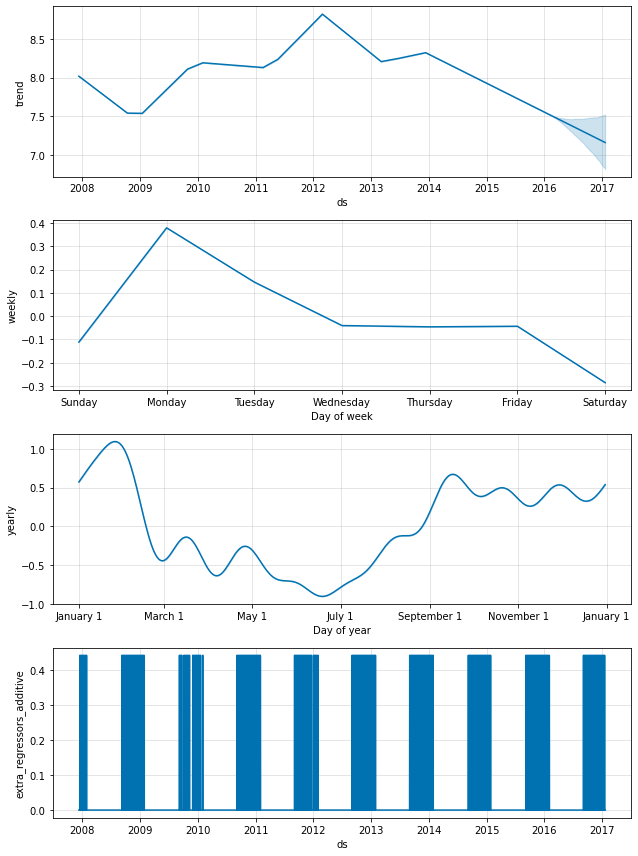

In [16]:
m.plot_components(forecast)
plt.show()